# SVC Algorythm Hyperparameters

**Import Dependencies**

In [1]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

**Load and Prepare Dataset**

In [2]:
digits = load_digits()
X = digits.data
y = digits.target

**Split Data**

In [3]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42
)

**Define Hyperparameters and Grid**

In [4]:
C_values = [0.1, 1, 10]
kernel_values = ["linear", "poly", "rbf"]

param_grid = {"C": C_values, "kernel": kernel_values}

**Create Model**

In [5]:
model = SVC(random_state=42)

**Grid Search**

In [6]:
grid_search = GridSearchCV(model, param_grid, cv=3)
grid_search.fit(X_train_val, y_train_val)

GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf']})

**Best Parameters and Accuracy**

In [7]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

**Print Results**

In [8]:
print("Best parameters |", best_parameters)
print("Accuracy |", best_accuracy)

Best parameters | {'C': 10, 'kernel': 'rbf'}
Accuracy | 0.9881697981906751


**Visualization**

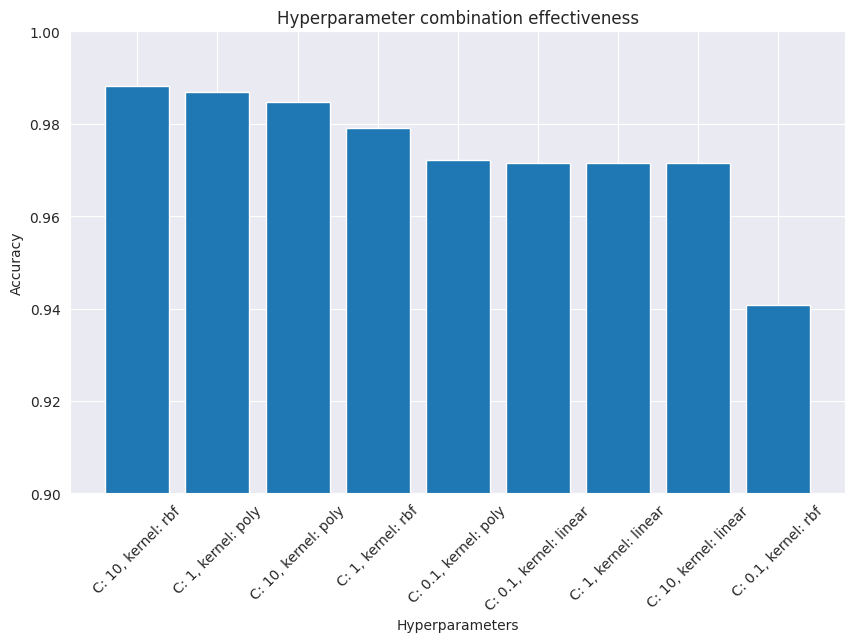

In [9]:
results = grid_search.cv_results_
sorted_indices = results["rank_test_score"].argsort()
sorted_hyperparams = [
    f"C: {results['param_C'][i]}, kernel: {results['param_kernel'][i]}"
    for i in sorted_indices
]
sorted_accuracies = results["mean_test_score"][sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(sorted_hyperparams, sorted_accuracies)
plt.xticks(rotation=45)
plt.xlabel("Hyperparameters")
plt.ylabel("Accuracy")
plt.title("Hyperparameters combination efficiency")
plt.ylim(0.9, 1)
plt.show()